# K-Nearest Neighbour

## Introduction

KNN is a simple, supervised machine learning (ML) algorithm that can be used for the classification of data points. This algorithm is also used in missing value imputation which is where missing values in a dataset are regenerted using KNN. The main philosophy behind KNN is that the observations closest to a given data point are the most to the data point itself. This means taht we can classify new and unseen data points based on the values of the closest existing points around the new point. By choosing for value of K, the user can select the number of nearby points to take into account when calculating the class of the new value.

Here, I will show you how to implement the KNN algorithm for classification and we will investigate how changing the value of K can modify the predicted class.

## How does it work?

The value of K is the number of nearest neighbor data points to use for classification. A majority vote is used to determined which class a new data point should go in. Larger values for K are often more robust to annomolous results and produce more stable decision boundaries than small values of K. However, choosing a good value of K is largely dependant on the specific data we are working with.

## KNN Using the Scikit Learn Module

Let's start by importing the modules that we need.

In [1]:
!pip install matplotlib
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/59/c7/f8da659997fe3210fdda689cf2d7720b3a079578fb8aecc3623c4e091a77/matplotlib-3.8.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/75/d4/c3b7a9a0d1f99b528e5a46266b0b9f13aad5a0dd1156d071418df314c427/contourpy-1.1.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/24/01/9bb5e115206b5c7f7894978f9af57a3d17c94fbc0df913389f1eaf334a68/fonttools-4.43.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/155.5 kB ? eta -:-


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Then we need to visualise some data points. We are using two different features but this algorithm is able to work works on any number of features.

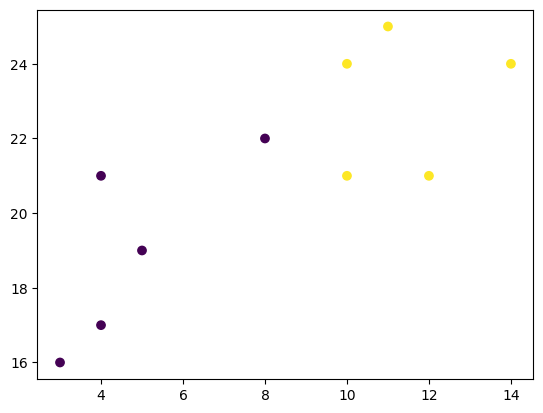

In [5]:
# import the matplotlib library
import matplotlib.pyplot as plt

# the first input feature for each data point
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]

# the second input feature for each data point
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

# the correct classification for each data point
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

# create a scatter plot using matlibplot which the two features on the axis and the colour representing the class
plt.scatter(x, y, c=classes)

# show the scatter plot
plt.show()

Now we fit (train) an initialised KNN model with a K value of 1.

In [6]:
# import the ML scikit learn
from sklearn.neighbors import KNeighborsClassifier

# zip the data so that the data points are set as pairs
data = list(zip(x, y))

# print to check the data
print(data)

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model with the data
# this means passing the data with correct class labels into the model
knn.fit(data, classes)

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21)]


KNeighborsClassifier(n_neighbors=1)

Now we can use this model to classify a new data point.

[0]


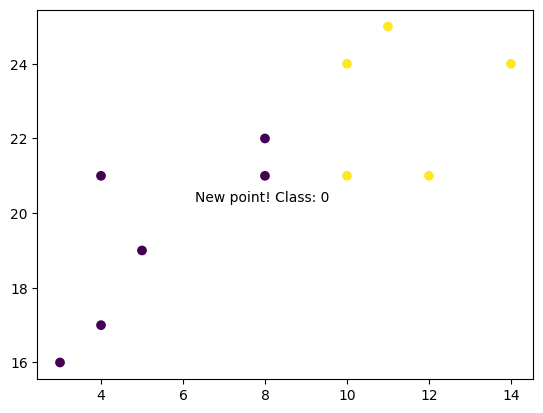

In [15]:
# create a new data point
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

# ask the model to make a prediciton for the class of the new datapoint
prediction = knn.predict(new_point)

# print the prediction
print(prediction)

# add the new point with its class onto the previously generated 
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"New point! Class: {prediction[0]}")
plt.show()

Now we do the same thing again, but this time we use a much higher K value. Notice how it changes the prediction.

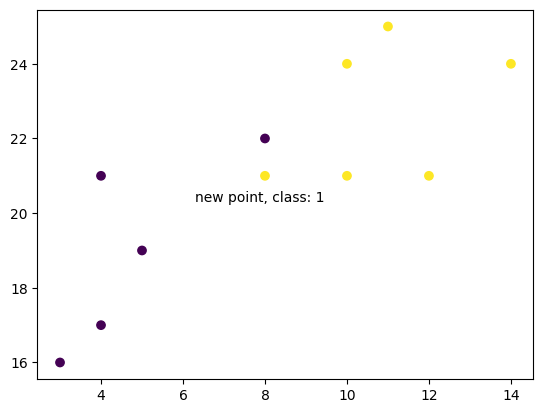

In [16]:
# instantiate a new classifier with a k value of 5
knn = KNeighborsClassifier(n_neighbors=5)

# fit the data to the model
knn.fit(data, classes)

# make a prediciton on the new point
prediction = knn.predict(new_point)

# add the new point to the scatter plot
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

Amazing! 

## KNN Using Pure Python

As a bonus exercise take a look at the code below. It implements the KNN algorithm, giving us a behind the seens look at what happens inside the scilearn library.

In [17]:
# import the sqrt module for find the sqrt of a number
from math import sqrt

# function to calculate the Euclidean distance between two pairs of data points
def euclidean_distance(pairA, pairB):
    
    # find the distance between pairA and pairB using pythagoras theorem
    # **2 means to the power of 2
    return sqrt((pairA[0] - pairB[0])**2 + (pairA[1] - pairB[1])**2)

# locate the most similar neighbors
def get_neighbors(data, test_point, k):

    # create a new list called distances
    distances = list()   

    # for each pair of data, find the distance to the test point
    for pair in data:
        
        # use our function to find the distance
        dist = euclidean_distance(test_point, pair)
        
        # append the distance to our list of distances
        distances.append((pair, dist))
        
        # sort this list 
        distances.sort(key=lambda tup: tup[1])
        
    # create a new list called neighbors
    neighbors = list()

    # remove distances are aren't within the first k distances
    for i in range(k):
        neighbors.append(distances[i][0])
    
    return neighbors

# make a classification prediction with neighbors
def predict_classification(train, test_point, k):

    # get the list of nearest neighbours using our function
    neighbors = get_neighbors(train, test_point, k)
    
    # get a list of the classes for the neighbours
    output_classes = [point[-1] for point in neighbors]
    
    # make the prediction based of the most frequent class
    prediction = max(set(output_classes), key=output_classes.count)

    return prediction

# create the data
data = list(zip(x, y, classes))

# test point
test_point = [10,25,1]

# make the prediction
prediction = predict_classification(data, test_point, 3)

# print the expected prediction with the one we got
print('Expected %d, Got %d.' % (test_point[-1], prediction))

Expected 1, Got 1.
